
# <font color='#F5B167'> MD009 Kernel density estimation </font>

### <font color='#F5B167'> INTRODUCCIÓN </font>

Probemos a generar una distribución con pocas entradas y a usar el método de KDE para aproximarla. Comprobaremos el efecto de cambiar el bandwidth y tipo de Kernel.
Generamos 100 entradas según una distribución Weibull, dibujamos el histograma y superponemos la distribución teórica.

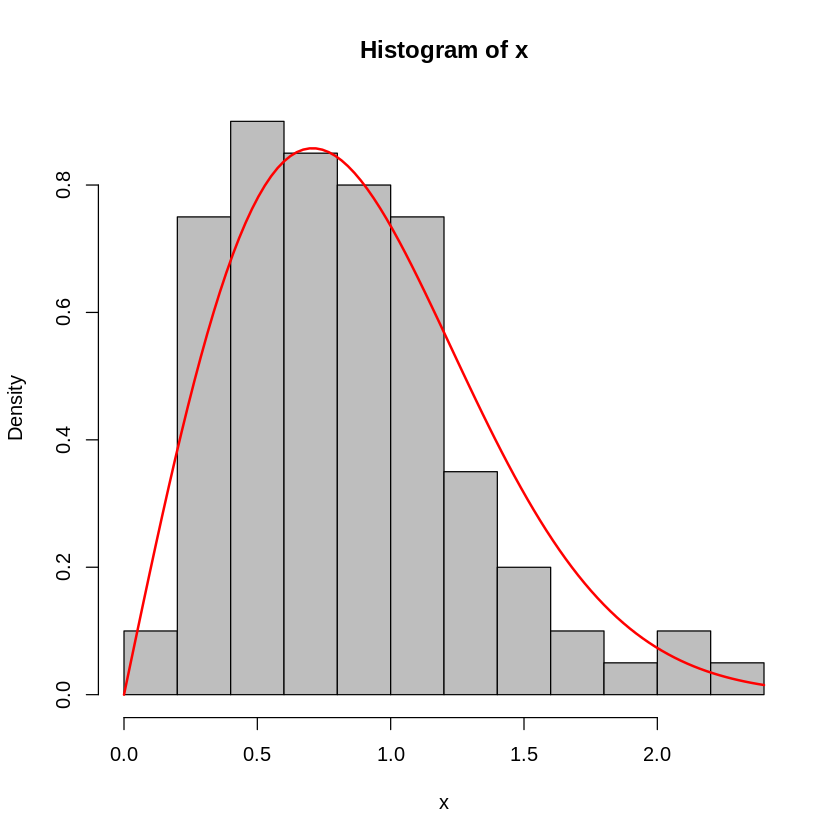

In [22]:
x = rweibull(100, shape = 2) #Generamos 100 datos que siguen la distribución de Weibull con el parámetro de la forma =2
hist(x, freq = F, breaks = 10, col = 'grey')
curve(dweibull(x, shape = 2), add = T, col = 'red', lw = 2)

En primer lugar estimaremos la densidad de Kernel con los parámetros por defecto (kernel='gaussian', bandwidth="nrd0").

*(Más información [aquí](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/density))*

[1] 0.1637373

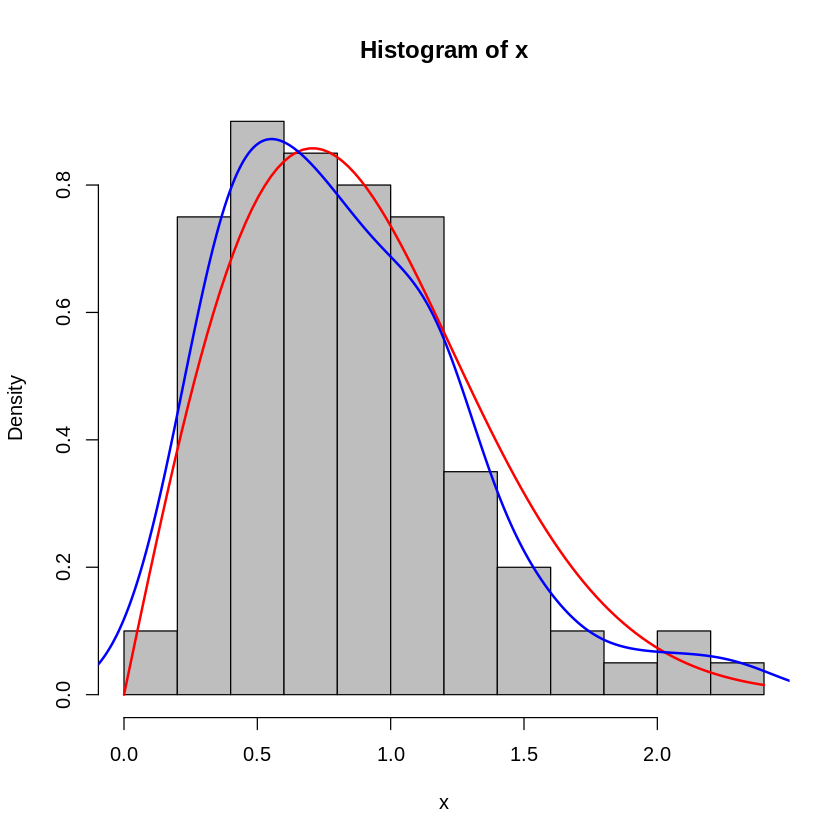

In [23]:
d = density(x) #estimamos la densidad con los parámetros por defecto
hist(x, freq = F, breaks = 10, col = 'grey')
curve(dweibull(x, shape = 2), add = T,  col = 'red', lw = 2)
lines(d, col = 'blue', lw = 2)
d$bw #devuelve el bandwidth usado
#visualizamos el histograma con la función de densidad teórica y la densidad de Kernel

Parece algo sensible a la estadística disponible. A continuación probamos a modificar el bandwidth, h.

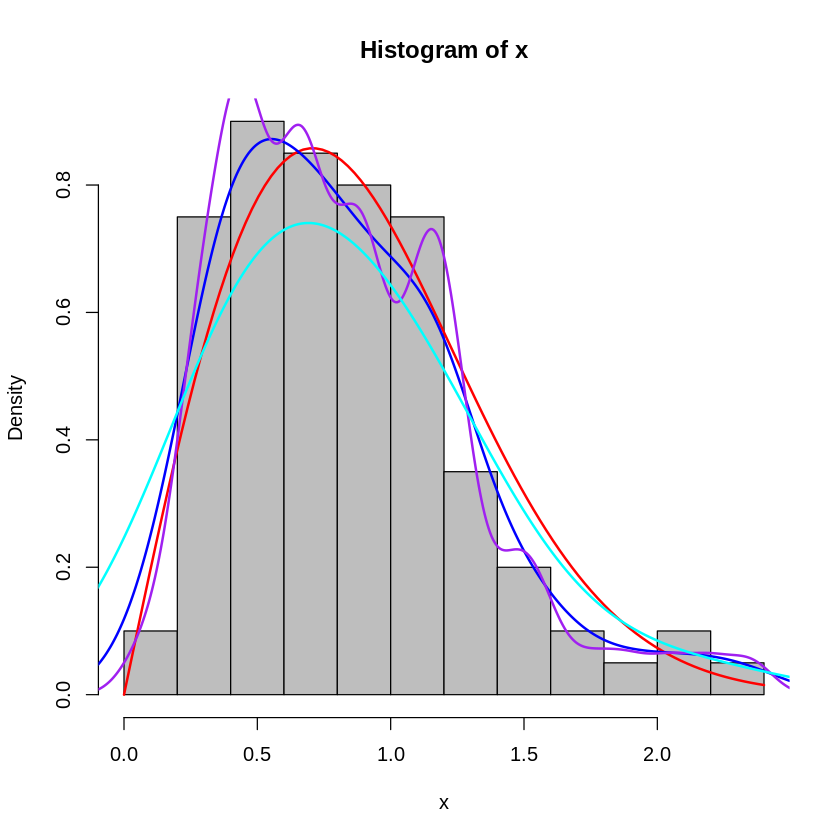

In [24]:
d2 = density(x, adjust = 0.5) #Establecemos el bandwidth como 0.5 veces el establecido por defecto
d3 = density(x, adjust = 2) #Establecemos el bandwidth como 2 veces el establecido por defecto
hist(x, freq = F, breaks = 10, col = 'grey')
curve(dweibull(x, shape = 2), add = T, col = 'red', lw = 2)
lines(d, col = 'blue', lw = 2)
lines(d2, col = 'purple', lw = 2)
lines(d3, col = 'cyan', lw = 2)

Observamos como disminuir h un factor 2 (en lila) da lugar a una distribución que reproduce más las fluctuaciones estadísticas de la muestra. Incrementar h un factor 2 (en cian), suaviza demasiado la curva y en algún otro caso particular podría perderse sensibilidad a la forma real de la distribución. El valor por defecto (azul), parece un buen compromiso, obtiendo una distribución más cercana a la teórica (en rojo), pero un valor algo mayor podría resultar mejor en este caso.
En vez de reescalar el valor del bandwitdh, probamos otro método para estimar su valor, como el cross-validation.

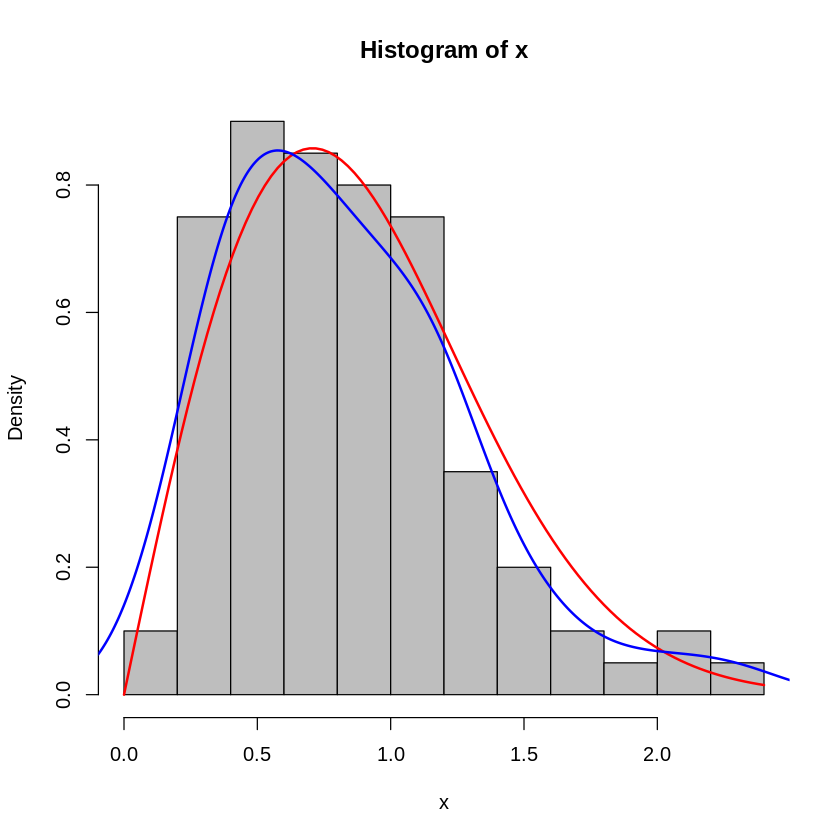

In [27]:
d5 = density(x, bw = "ucv") #"ucv" es la validación cruzada sin sesgo (unbiased cross-validation)
hist(x, freq = F, breaks = 10, col = 'grey')
curve(dweibull(x, shape = 2), add = T, col = 'red', lw = 2)
lines(d5, col = 'blue', lw = 2)

In [26]:
d5$bw

[1] 0.1854106

Donde ahora h = 0.185, y el resultado es similar al valor por defecto (h=0.164). 
A continuación, podemos probar otro tipo de kernel, por ejemplo "epanechnikov".

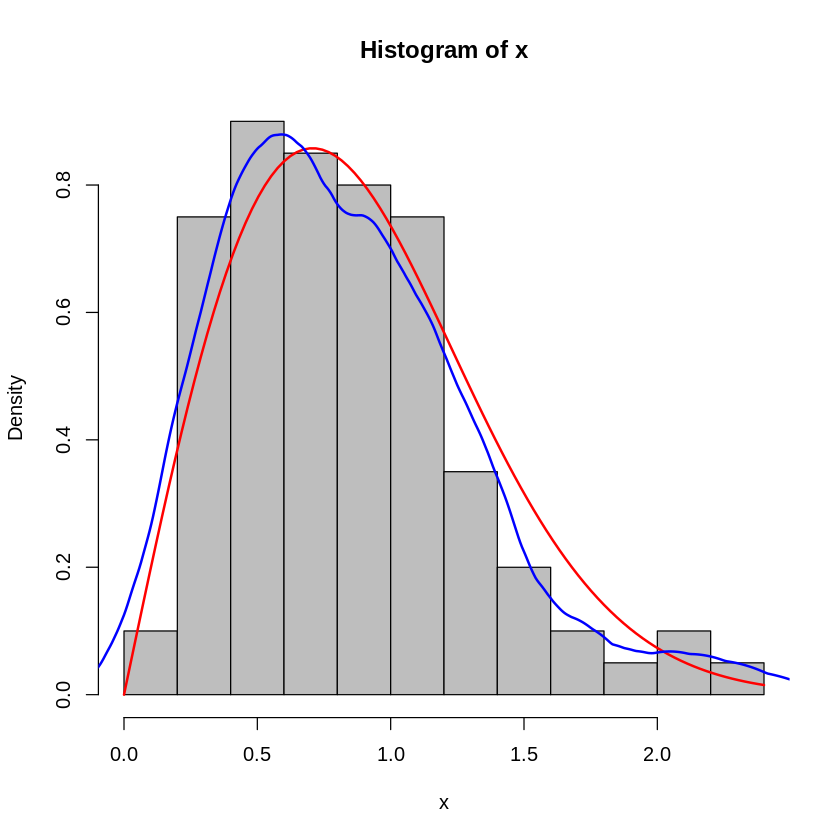

In [28]:
d4 = density(x, kernel = "epanechnikov")
hist(x, freq = F, breaks = 10, col = 'grey')
curve(dweibull(x, shape = 2), add = T, col = 'red', lw = 2)
lines(d4, col = 'blue', lw = 2)

In [29]:
d4$bw

[1] 0.1637373

En este caso el resultado es casi el mismo que el valor por defecto.

### <font color='#F5B167'> GENERACIÓN DE DATOS A PARTIR DE UN KDE </font>

Podemos generar valores a partir de una distribución obtenida por el método de Kernel Density Estimation, a partir de su CDF (función de densidad acumulada), como en el caso de cualquier otra distribución de probabilidad.

Primero, vamos a generar unos pocos datos según una distribución de Weibull. Supongamos que ignoramos qué distribución de probabilidad describe nuestra muestra, por lo cual, utilizamos el método de KDE para describirla. 

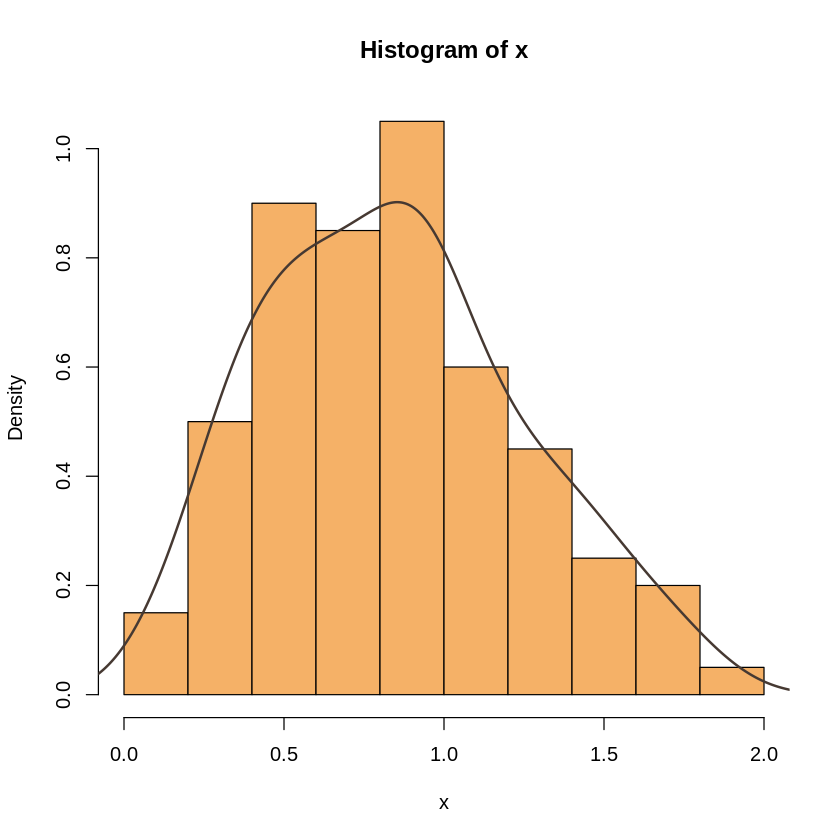

In [31]:
x = rweibull(100, shape=2)
d = density(x)
hist(x, freq = F, breaks = 10, col = '#F5B167')
lines(d, col = '#463932', lw = 2)

Ahora utilizaremos la función approx de R para interpolar la función acumulada de la densidad obtenida, de manera que generamos, por ejemplo, 10000 valores que siguen la distribución deseada.

*(Más información sobre la función approx [aquí](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/approxfun))*

In [32]:
random.points <- approx(
  cumsum(d$y)/sum(d$y), #d$y devuelve los valores estimados de la densidad
  d$x, #d$x devuelve los valores de las coordenadas donde se ha estimado la densidad
  runif(10000)
)$y

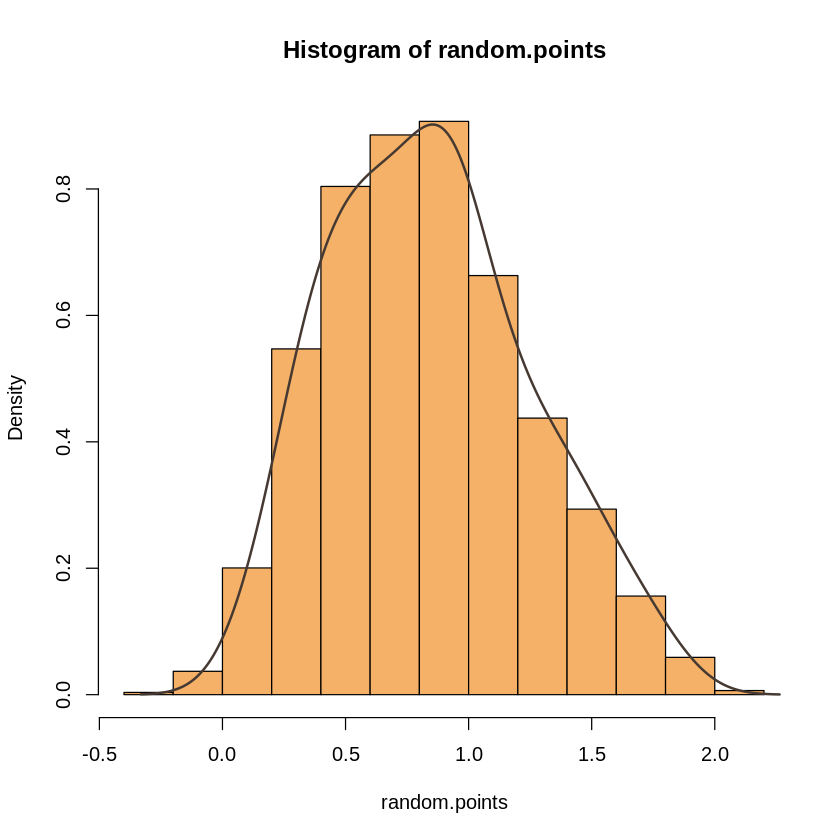

In [33]:
hist(random.points, freq = F, col = '#F5B167')
lines(d, col = '#463932', lw = 2)

Alternativamente, podemos utilizar alguna librería que genere números aleatorios a partir del KDE, como simukde.

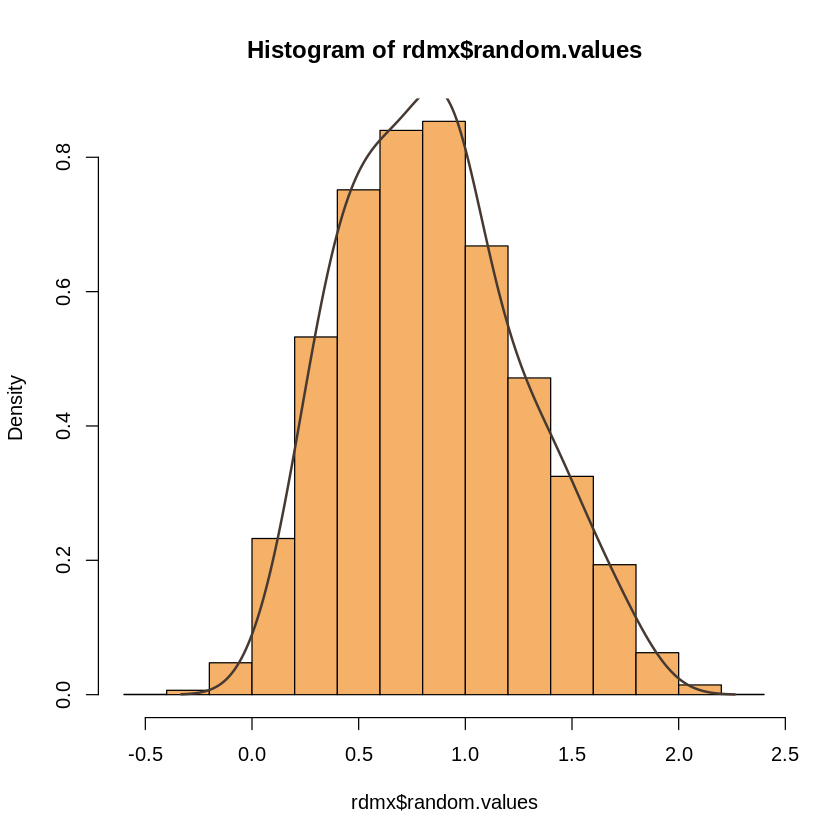

In [35]:
#install.packages('simukde', repos='https://cran.rediris.es/')
rdmx <- simukde::simulate_kde(x, n = 10000)
hist(rdmx$random.values, freq = F, col = '#F5B167')
lines(d, col = '#463932', lw = 2)

Comparamos la distribución de los datos simulados por los dos métodos. Son muy parecidas.

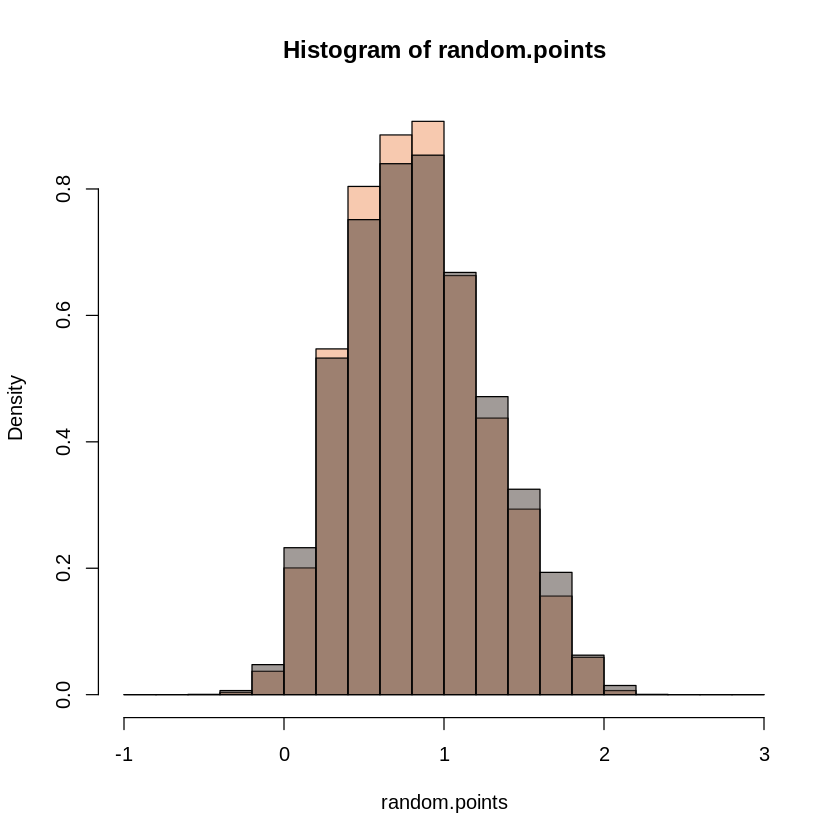

In [36]:
hist(random.points, freq = F, col = rgb(0.94,0.58,0.38,0.5), breaks = seq(-1,3, by = 0.2), xlim = c(-1,3))
hist(rdmx$random.values, freq = F, add = T, col = rgb(0.27,0.22,0.2,0.5), breaks = seq(-1,3, by = 0.2), xlim = c(-1,3))